In [8]:
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools


def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix\\\\")
    #else:
        #print('Confusion matrix, without normalization\\\\')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#carichiamo i dati 
df = pd.read_csv("exoplanet.csv")
df.info()
df = df.replace('CONFIRMED', 1) #1
df = df.replace('CANDIDATE', 2) #2
df = df.replace('FALSE POSITIVE', 0) #0
df = df.fillna(0)

df.to_csv("Exoplanet_mod.csv")
#df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,1,2,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,1,2,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,0,0,0,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,0,0,0,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,1,2,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,0,0,0,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,0,0,0,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,0,2,2,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,0,0,0,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [9]:


#normalize feature with MinMaxScaler after it we need to fit the data
MinMaxScaler = preprocessing.MinMaxScaler()

y_data = pd.read_csv('Exoplanet_mod.csv', usecols= ['koi_disposition'])#.values.transpose()[0]
x_data = pd.read_csv('Exoplanet_mod.csv', usecols= ['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_period','koi_period_err1','koi_period_err2','koi_time0bk','koi_time0bk_err1','koi_time0bk_err2','koi_impact','koi_impact_err1','koi_impact_err2','koi_duration','koi_duration_err1','koi_duration_err2','koi_depth','koi_depth_err1','koi_depth_err2','koi_prad','koi_prad_err1','koi_prad_err2','koi_teq','koi_teq_err1','koi_teq_err2','koi_insol','koi_insol_err1','koi_insol_err2','koi_model_snr','koi_tce_plnt_num','koi_steff','koi_steff_err1','koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag'])

#take the 80% of data for train and 20% for test
x_train = x_data.values
y_train = y_data

# x_test = MinMaxScaler.fit_transform(x_test)

print(y_train.shape)
print(x_train.shape)

x_train = MinMaxScaler.fit_transform(x_train)


(9564, 1)
(9564, 42)


[0.29091492 0.52305233 0.67371326 0.74816526 0.81118801 0.86698965
 0.91018508 0.92617483 0.94014572 0.94988998 0.95813543 0.96514019
 0.97118048 0.97650686 0.98023552 0.98353936 0.98621566 0.98857426
 0.99073101 0.99258429 0.99431472 0.99585719 0.99701736 0.99790035
 0.99836526 0.99875531 0.99904002 0.99928541 0.99952183 0.9996674
 0.99979609 0.99990226 0.99996544 0.99999318 0.99999797 1.
 1.         1.         1.         1.         1.         1.        ]


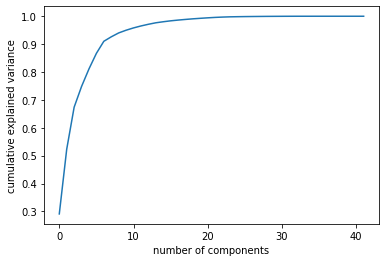

In [10]:
from sklearn.cluster import KMeans
from utils import plot_shape
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1)
k = 3
max_iter = 500

#-----------------------------------------------------
#CALCOLO PCA CON SKLEARN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=5, svd_solver='full')
pca = PCA().fit(x_train)

cum_var = np.cumsum(pca.explained_variance_ratio_)
print(cum_var)
#print(pca.singular_values_)

plt.plot(cum_var)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
# pca = PCA(64).fit(x_train)
# x_train = pca.transform(x_train)

XT = pca.transform(x_train)
#plt.scatter(XT[:,0], XT[:,1], c=y_train.to_numpy())
plt.show()
#-----------------------------------------------------

# Init estimator and fit it on the data
#sk_kmeans_XT = KMeans(n_clusters=k, max_iter=max_iter).fit(XT)

# Get predicted labels and centroids
#sk_labels_XT = sk_kmeans_XT.labels_
#sk_centroids_XT = sk_kmeans_XT.cluster_centers_

# Display the final clustering and the segmented shape and print the centroids
#plot_shape(XT, np.reshape(sk_labels,(7650,1)))

#fig = plt.figure(figsize=(10,10))
#ax = Axes3D(fig, azim=-90, elev=90)
#ax.plot(sk_centroids_XT[:,0], sk_centroids_XT[:,1], marker='*', ls='none', ms=20, zorder=10000, c='red')
#ax.scatter(XT[:,0],XT[:,1],XT[:,2],c=np.reshape(sk_labels_XT,(9564,1)))
#ax.auto_scale_xyz([-1, 1], [-1,1], [0,1])



#print(XT.shape, sk_centroids[:,0], sk_centroids[:,1])

#plt.plot([3, 4], [6, 7], marker='*', ls='none', ms=20)

In [11]:
from sklearn.cluster import KMeans
from utils import plot_shape
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1)
k = 3
max_iter = 500

# Init estimator and fit it on the data
sk_kmeans = KMeans(n_clusters=k, max_iter=max_iter).fit(XT)  #XT

# Get predicted labels and centroids
sk_labels = sk_kmeans.labels_
sk_centroids = sk_kmeans.cluster_centers_
sk_predicts = sk_kmeans.predict


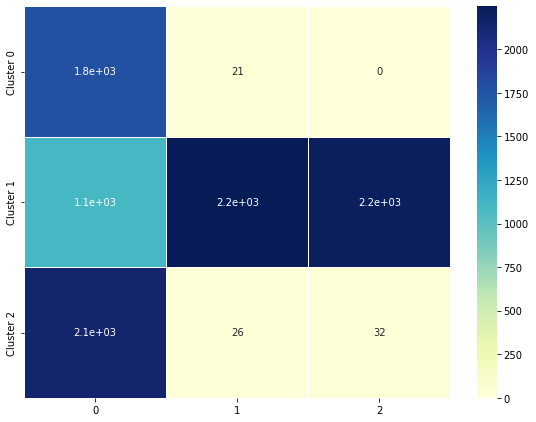

In [12]:
import seaborn as sns

plt.figure(figsize=(21, 18))
plt.subplots_adjust(hspace=0.5)

types = ["0","1","2"]

    ##model = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters).fit(np.reshape(sk_labels,(9564,1)))
model = sk_kmeans
clusters = model.labels_
results = np.column_stack((y_data, clusters))
occur_mat = np.zeros(shape=(3, 3))
for i in range(results.shape[0]):
    occur = results[i,:]
    occur_mat[occur[1],occur[0]] += 1

sns.heatmap(occur_mat, vmin=0, vmax=np.max(occur_mat), ax=plt.subplot(2, 2, 1),
            xticklabels=types, yticklabels=[f"Cluster {i}" for i in range(3)],
            annot=True, linewidths=.5, cmap="YlGnBu")
            
plt.show()

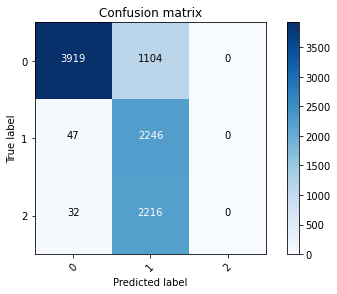

In [13]:
# Prep
k_labels = model.labels_  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

# For each cluster label...
for k in np.unique(k_labels):
    # ...find and assign the best-matching truth label
    match_nums = [np.sum((np.reshape(k_labels,(9564,1))==k)*(np.reshape(y_train,(9564,1))==t)) for t in np.unique(y_train)]
    k_labels_matched[k_labels==k] = np.unique(y_train)[np.argmax(match_nums)]


# Compute confusion matrix
classes = ['0','1','2']
confusion_matrix= metrics.confusion_matrix(y_train, k_labels_matched)

plot_confusion_matrix(confusion_matrix, classes)
plt.show()